In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
%matplotlib widget
plt.ioff()

In [2]:
data = np.load("speedups/nb_checkpoints v2.0 2025-02-10 10:59.npz", allow_pickle=True)

git_tag=data["git_tag"].item()
traj_type=data["traj_type"].item()
traj_planned=data["traj_planned"]
param=data["param"].item()
name=data["name"].item()
measures=data["measures"].item()
hm=data["hm_states"].item()
#unit=data["unit"].item()
unit=""


In [3]:
x = list(measures.keys())
y = list(map(float,measures.values()))

In [4]:
import matplotlib.ticker as ticker

plt.plot(x, y, marker='o', linestyle='-', color='b', label="Évolution") 
plt.xlabel(f"{name} {unit}")
#plt.yscale('log')
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.ylabel("Time [s] (log)")

Text(0, 0.5, 'Time [s] (log)')

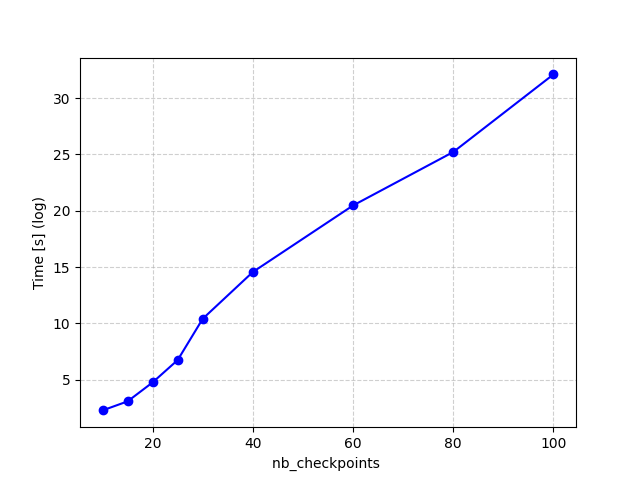

In [5]:
plt.show()

In [6]:
print(param)

{'field_edge_length': 1000, 'cell_edge_length': 5, 'grid_size': (200, 200), 'k': 0.125, 'vehicule_depth': 30, 'angle_of_respose': 30, 'erosion_threshold': 10, 'nb_checkpoints': 10, 'ellipse_semi_major_axis': 10, 'ellipse_semi_minor_axis': 6}


In [7]:

vmin = min(np.min(h) for h in hm.values())
vmax = max(np.max(h) for h in hm.values())
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "coolwarm"

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for ax, (title, data) in zip(axes.flat, hm.items()):
    res = ax.matshow(data, cmap=cmap, norm=norm, origin="lower")
    ax.set_title(f"{name} : {title}")  # Ajout du titre

cbar = fig.colorbar(res, ax=axes, shrink=0.8, location="right", label="Height [mm]")
    

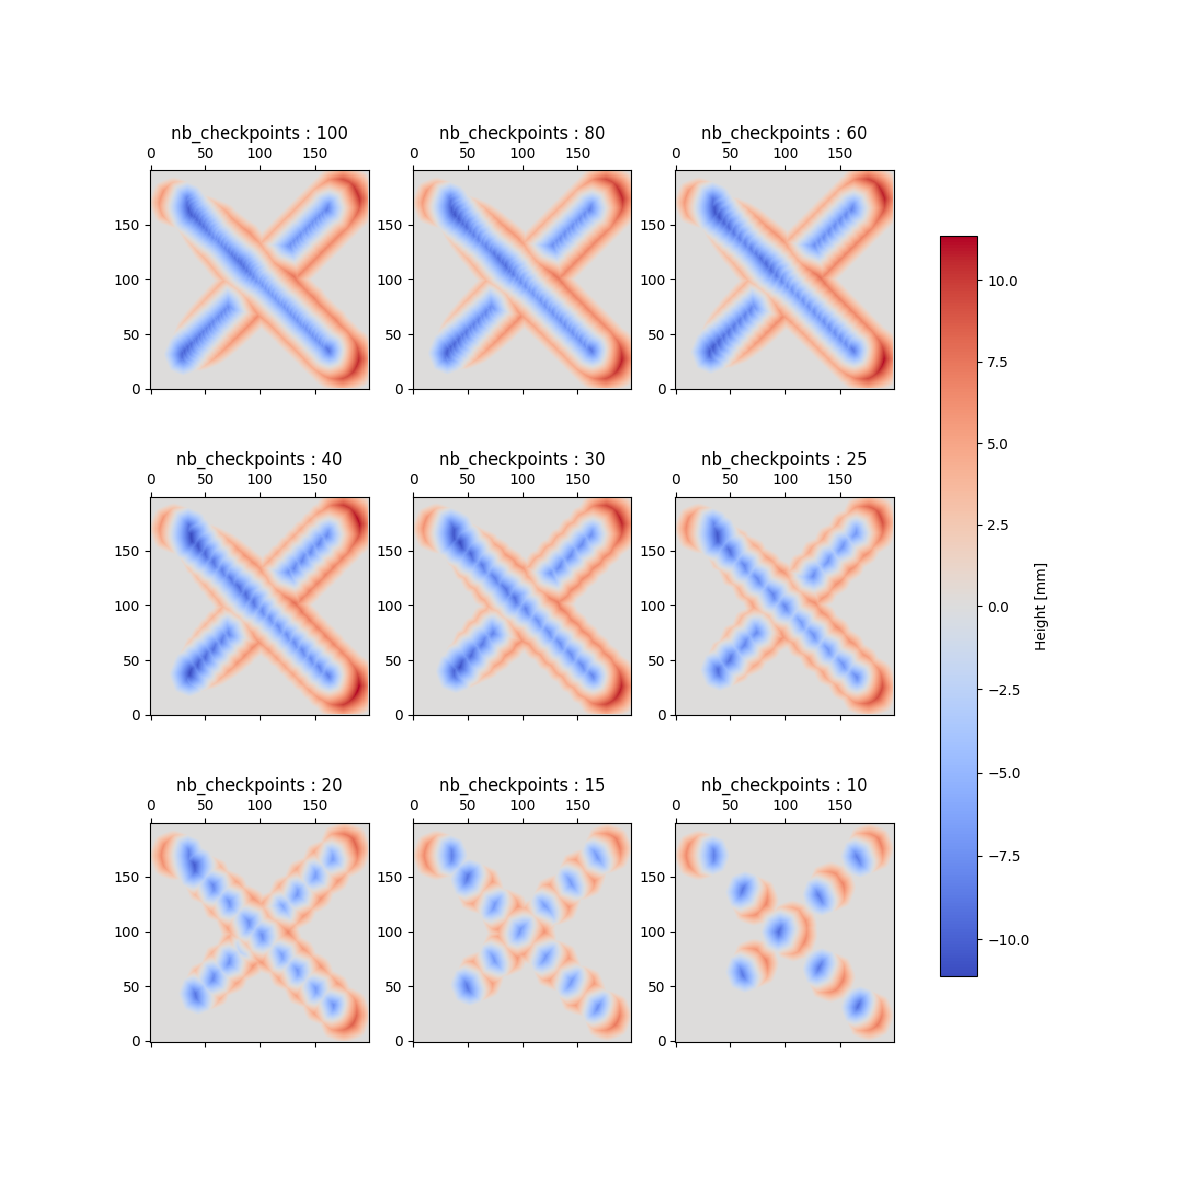

In [8]:
plt.show()